In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/인지기_에니스/new version/train_전력.csv',
                 encoding = 'utf-8')

In [ ]:
def vis_time_series_decompose(num):
    d = df[df.num==num]
    d.index = d.date_time

    res = sm.tsa.seasonal_decompose(d['전력사용량(kWh)'], model='additive')

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
    res.observed.plot(ax=ax1, title='Observed')
    res.trend.plot(ax=ax2, title='Trend')
    res.resid.plot(ax=ax3, title='Residual')
    res.seasonal.plot(ax=ax4, title='Seasonal')
    plt.tight_layout()
    plt.show()


In [ ]:
#요일
def weekday(x):
    if x.dayofweek == 6:
        return '일'
    elif x.dayofweek == 0:
        return '월'
    elif x.dayofweek == 1:
        return '화'
    elif x.dayofweek == 2:
        return '수'
    elif x.dayofweek == 3:
        return '목'
    elif x.dayofweek == 4:
        return '금'
    else:
        return '토'

# 주말 여부
def weekend(x):
    if x.dayofweek in [5, 6]:
        return 1
    else: 
        return 0

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month

df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['hour'] = df['date_time'].dt.hour
df['weekday'] = df['date_time'].apply(weekday)
df['weekend'] = df['date_time'].apply(weekend)
'''
test['month'] = test['date_time'].dt.month
test['day'] = test['date_time'].dt.day
test['hour'] = test['date_time'].dt.hour
test['weekday'] = test['date_time'].apply(weekday)
test['weekend'] = test['date_time'].apply(weekend)
'''

"\ntest['month'] = test['date_time'].dt.month\ntest['day'] = test['date_time'].dt.day\ntest['hour'] = test['date_time'].dt.hour\ntest['weekday'] = test['date_time'].apply(weekday)\ntest['weekend'] = test['date_time'].apply(weekend)\n"

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

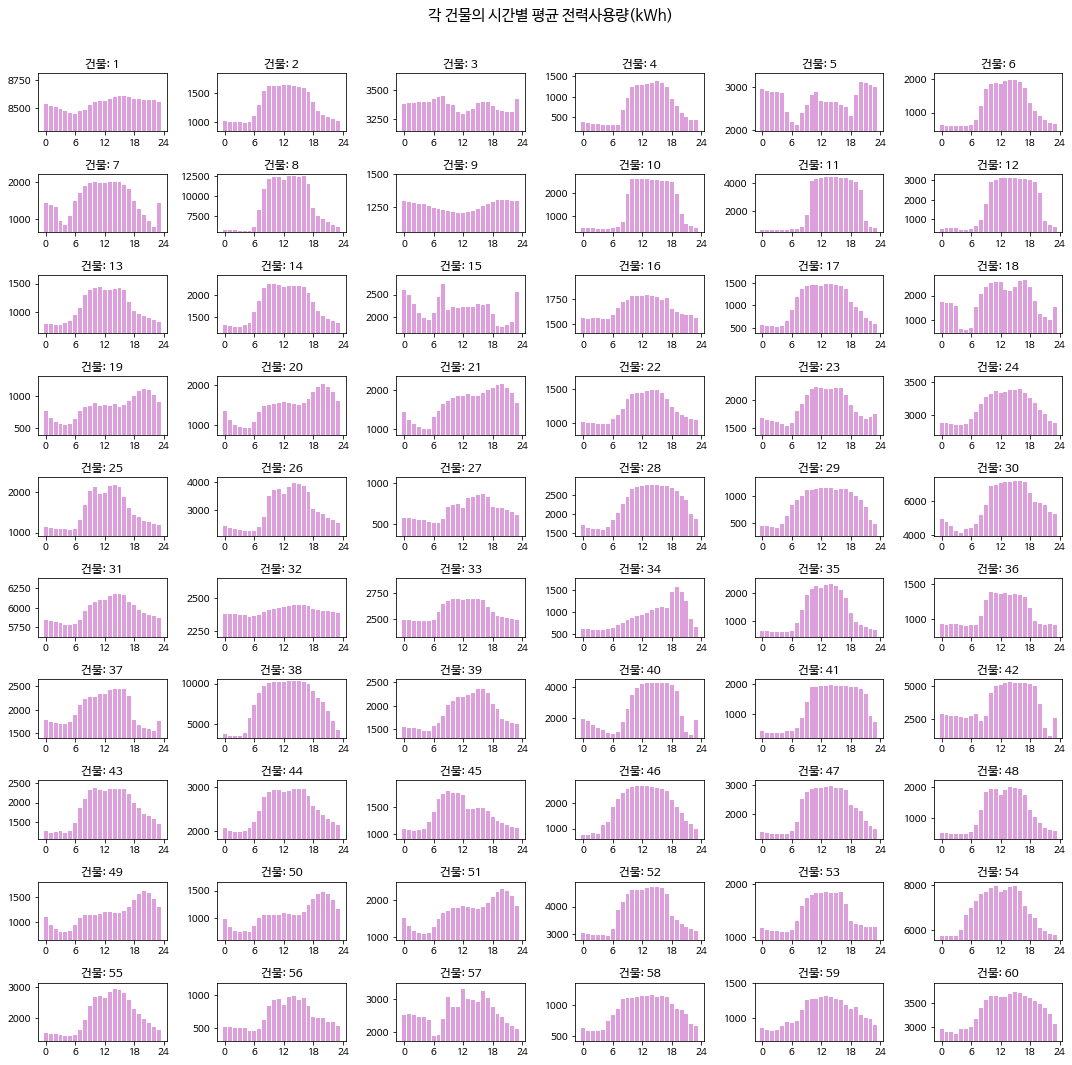

In [ ]:
fig = plt.figure(figsize = (15 ,15))
plt.title("각 건물의 시간별 평균 전력사용량(kWh)", fontsize=15, y=1.05)
plt.axis('off')

for num in range(1,61):
    d = df[df.num==num]
    max_num = max(d.groupby('hour')['전력사용량(kWh)'].mean())
    min_num = min(d.groupby('hour')['전력사용량(kWh)'].mean())
    ax = fig.add_subplot(10,6,num)
    ax.bar(d['hour'].unique(), d.groupby('hour')['전력사용량(kWh)'].mean(), width = 0.8,
           color = 'plum')
    
    
    plt.ylim(min_num-150, max_num+200)
    ax.set_title(f'건물: {num}')
    ax.set_xticks([0,6,12,18,24])
plt.tight_layout()
plt.show()

**매 시간 사용량이 일정한 건물**
  

*   항목 추가
*   항목 추가



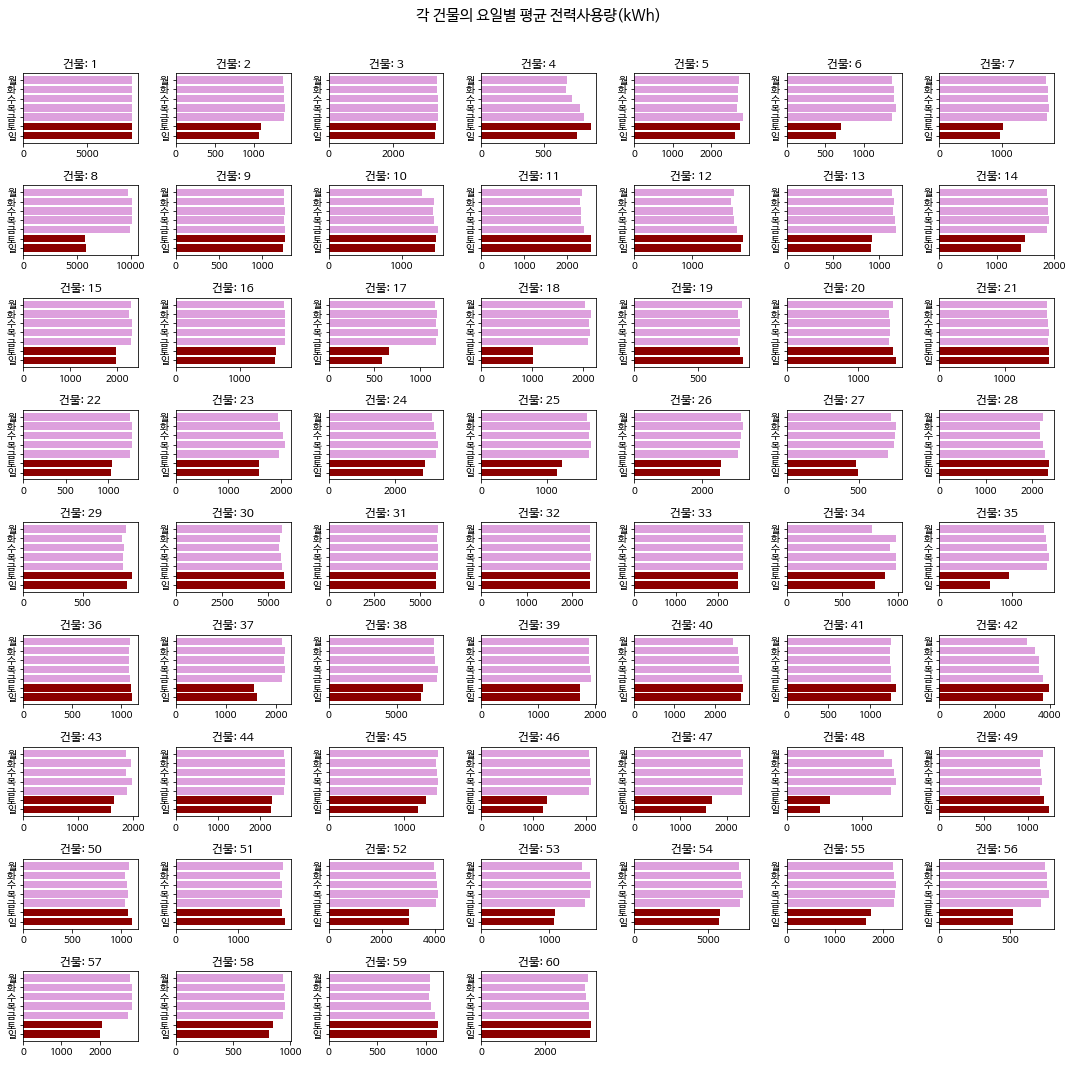

In [ ]:
fig = plt.figure(figsize = (15 ,15))
plt.title("각 건물의 요일별 평균 전력사용량(kWh)", fontsize=15, y=1.05)
plt.axis('off')

#weekday = ['월','화','수','목','금','토','일']
#colors = ['plum','plum','plum','plum','plum', 'darkred','darkred']

weekday = ['일','토','금','목','수','화','월']
colors = ['darkred','darkred', 'plum','plum','plum','plum','plum']

for num in range(1,61):
    d = df[df.num==num]
    d_counts = d.groupby('weekday')['전력사용량(kWh)'].mean()
    d_counts = d_counts.reindex(weekday)
    ax = fig.add_subplot(9,7,num)
    dayy = ['일', '토', '금', '목', '수', '화', '월']
    ax.barh(dayy, d_counts, color=colors)
    ax.set_title(f'건물: {num}')

plt.tight_layout()
plt.show()

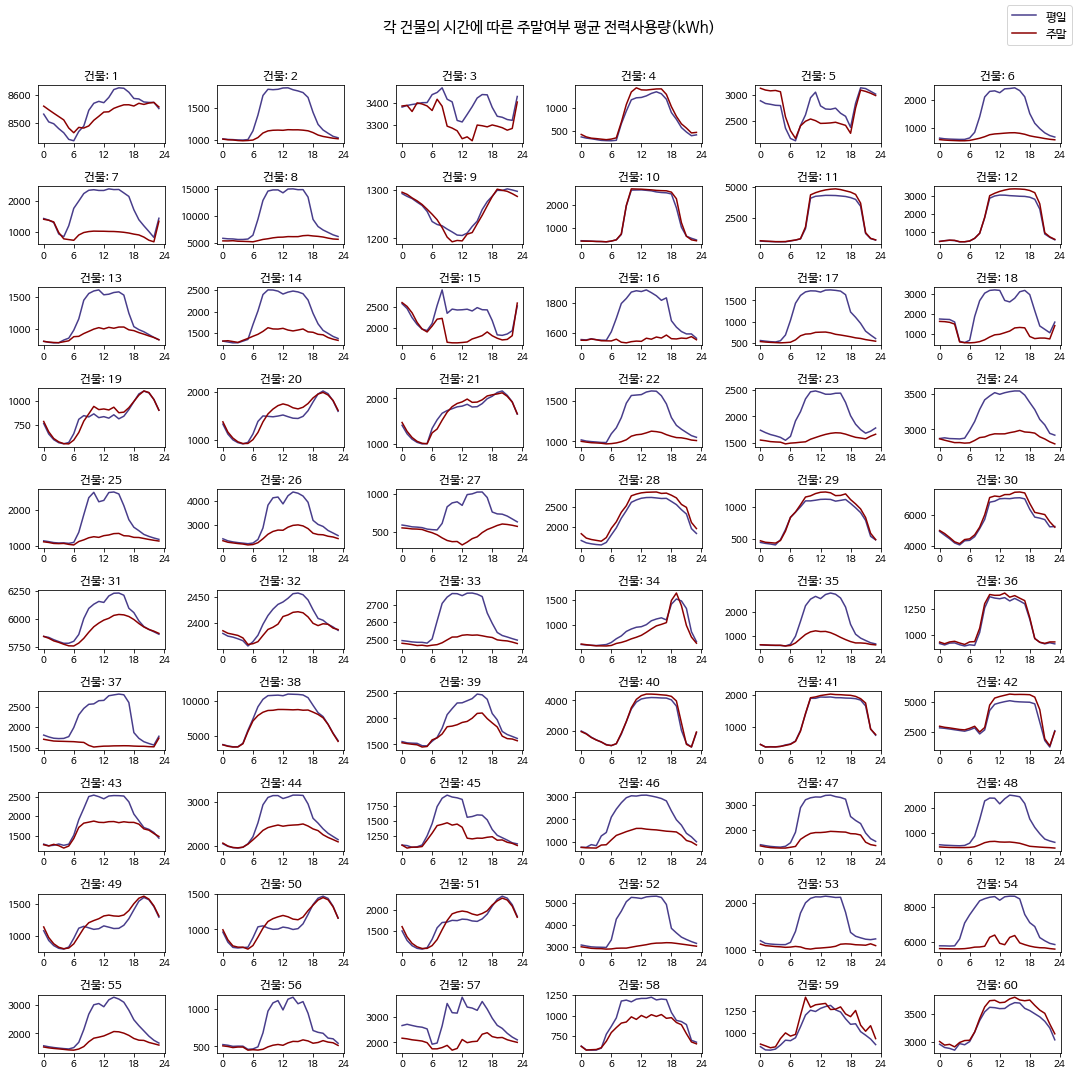

In [ ]:
fig = plt.figure(figsize = (15 ,15))
plt.title("각 건물의 시간에 따른 주말여부 평균 전력사용량(kWh)", fontsize=15, y=1.05)
plt.axis('off')

for num in range(1,61):
    d = df[df.num==num]
    ax = fig.add_subplot(10,6,num)
    ax.plot(d['hour'].unique(), d[d.weekend==0].groupby('hour')['전력사용량(kWh)'].mean(), label='평일', color='darkslateblue')
    ax.plot(d['hour'].unique(), d[d.weekend==1].groupby('hour')['전력사용량(kWh)'].mean(), label='주말', color='darkred')
    ax.set_title(f'건물: {num}')
    ax.set_xticks([0,6,12,18,24])
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 1, prop={'size':12})
plt.tight_layout()
plt.show()

**시계열 시각화**

In [ ]:
def vis_time_series_decompose(num):
    d = df[df.num==num]
    d.index = d.date_time

    res = sm.tsa.seasonal_decompose(d['전력사용량(kWh)'], model='additive')

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
    res.observed.plot(ax=ax1, title='Observed', color='darkslateblue')
    res.trend.plot(ax=ax2, title='Trend', color='darkslateblue')
    res.resid.plot(ax=ax3, title='Residual', color='darkslateblue')
    res.seasonal.plot(ax=ax4, title='Seasonal', color='darkslateblue')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


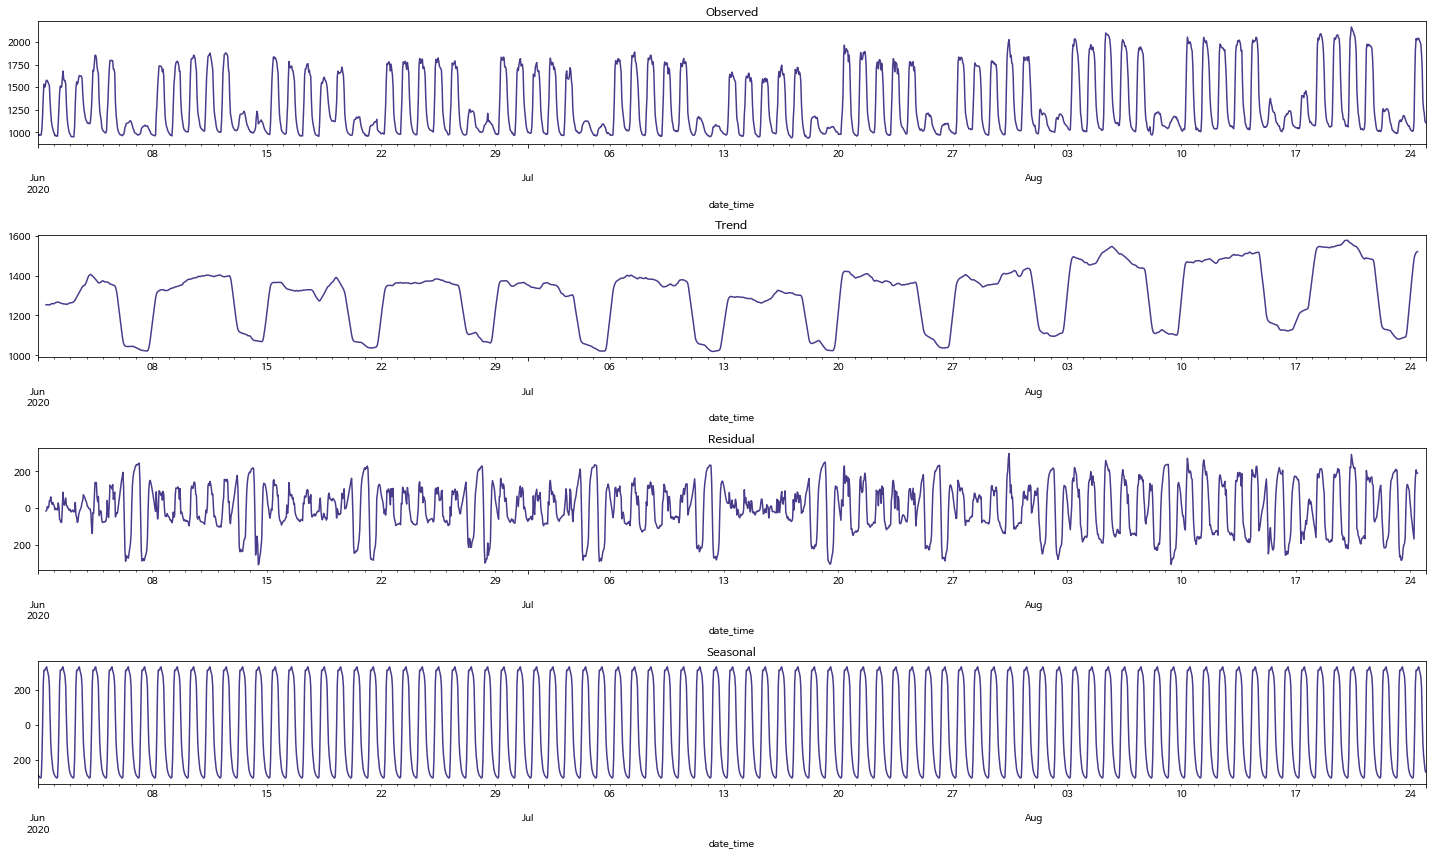

In [ ]:
vis_time_series_decompose(num=2)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


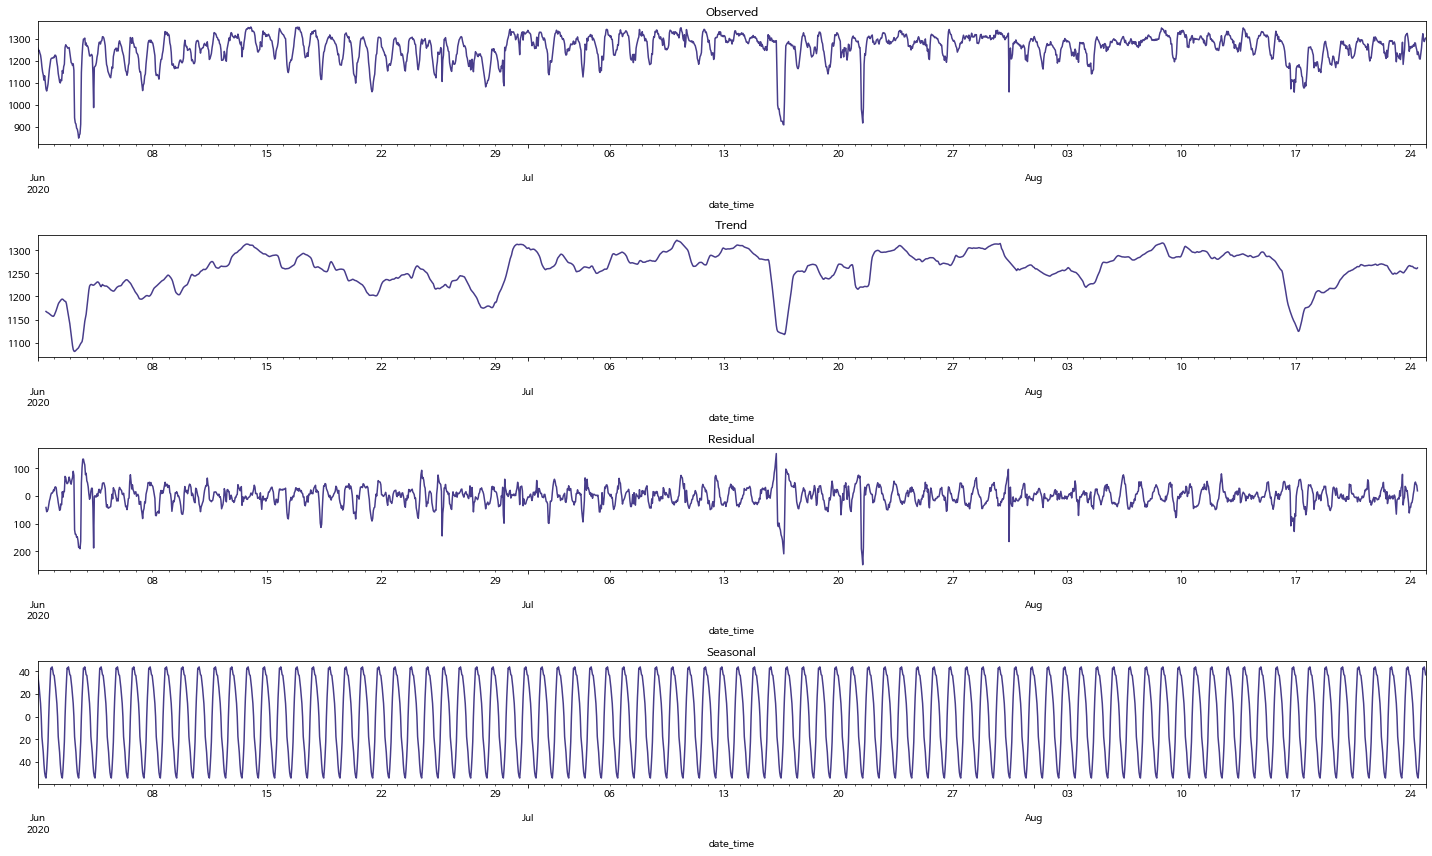

In [ ]:
vis_time_series_decompose(num=9)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


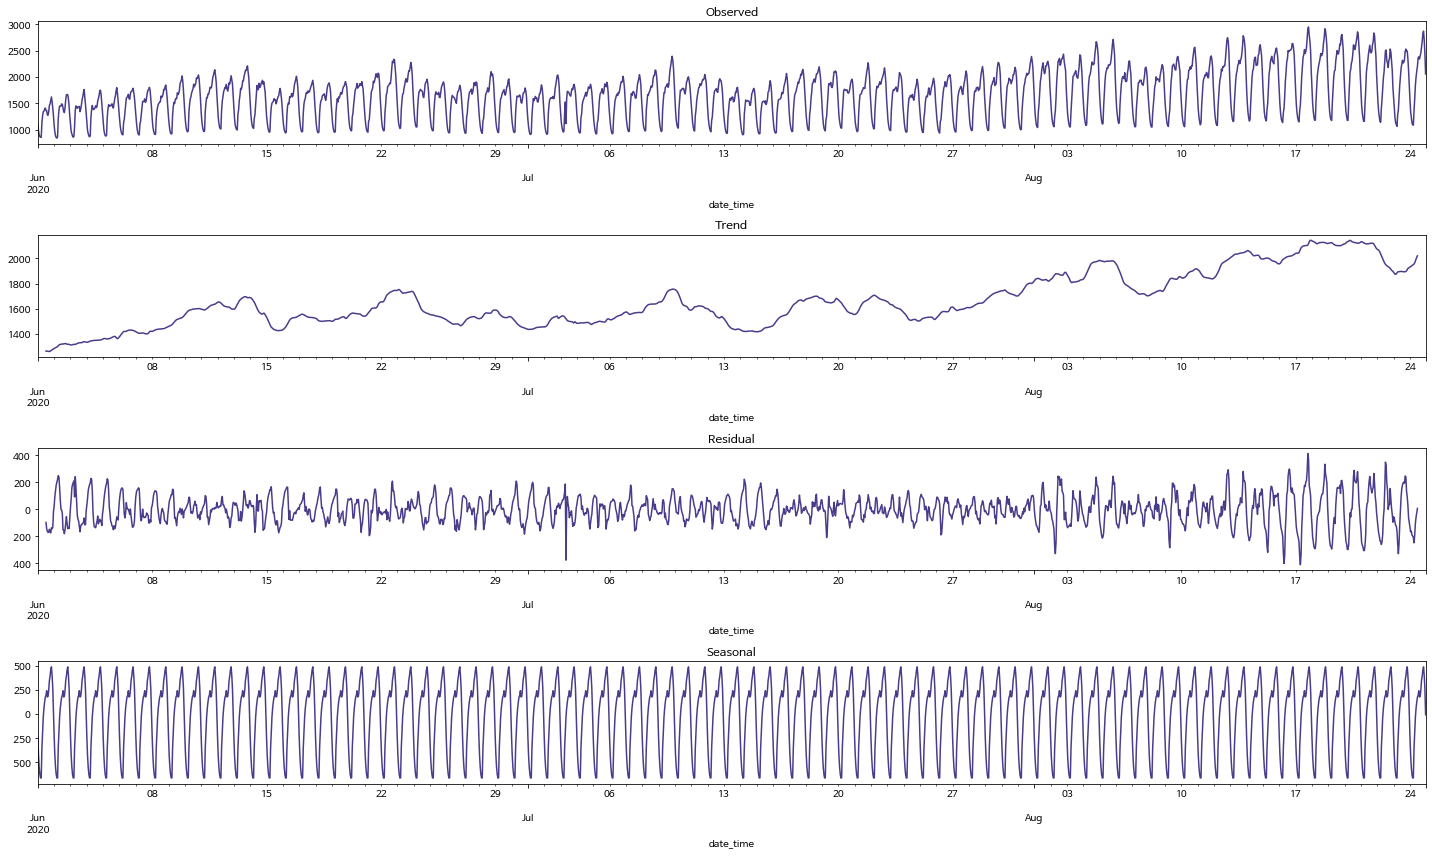

In [ ]:
vis_time_series_decompose(num=21)